In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [15]:
# utilities
def initIndex(df):
  df['DateTime'] = pd.to_datetime(df['Unnamed: 0'])
  df = df.set_index('DateTime')
  df.drop(columns="Unnamed: 0", inplace=True)
  return df

In [16]:
# Load pre-processed datasets
m1_hourly_sales = initIndex(pd.read_csv('datasets/compute/m1_hourly_sales.csv'))
m2_hourly_sales = initIndex(pd.read_csv('datasets/compute/m2_hourly_sales.csv'))
m3_hourly_sales = initIndex(pd.read_csv('datasets/compute/m3_hourly_sales.csv'))

In [17]:
# train 75% test 25%
m1_train_index = m1_hourly_sales.shape[0] * 0.75
m2_train_index = m2_hourly_sales.shape[0] * 0.75
m3_train_index = m3_hourly_sales.shape[0] * 0.75

# split train and test
m1_train = m1_hourly_sales[:int(m1_train_index)]
m1_test = m1_hourly_sales[int(m1_train_index):]

m2_train = m2_hourly_sales[:int(m2_train_index)]
m2_test = m2_hourly_sales[int(m2_train_index):]

m3_train = m3_hourly_sales[:int(m3_train_index)]
m3_test = m3_hourly_sales[int(m3_train_index):]

### Linear Regression

Linear Regression MSE: 22.77588870192087


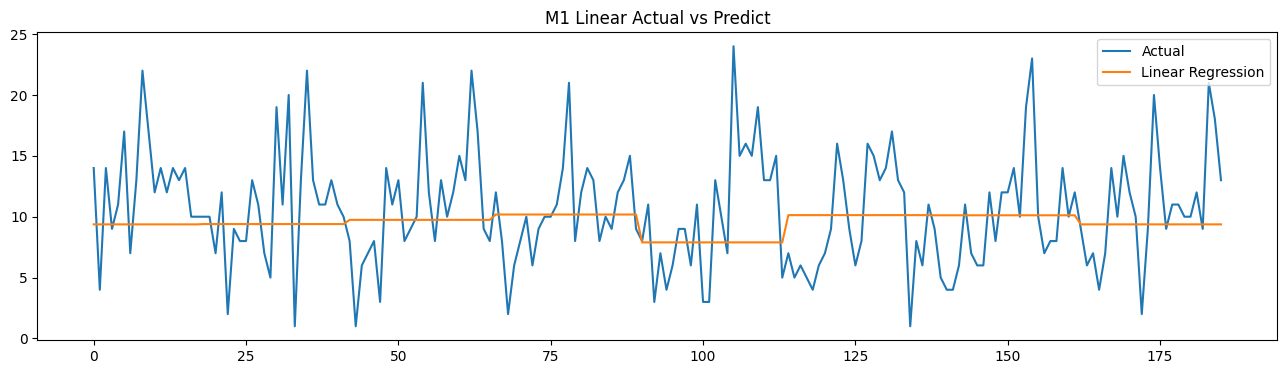

In [18]:
# Linear Regression
lr = LinearRegression()
lr.fit(m1_train.drop(columns=['amount']), m1_train['amount'])
lr_pred = lr.predict(m1_test.drop(columns=['amount']))
lr_mse = mean_squared_error(m1_test['amount'], lr_pred)
print('Linear Regression MSE:', lr_mse)

# plot actual vs predict
plt.figure(figsize=(16, 4))
plt.plot(m1_test['amount'].values, label='Actual')
plt.plot(lr_pred, label='Linear Regression')
plt.legend()
plt.title('M1 Linear Actual vs Predict');

### Random Forrest

Random Forest MSE: 22.977789654616284


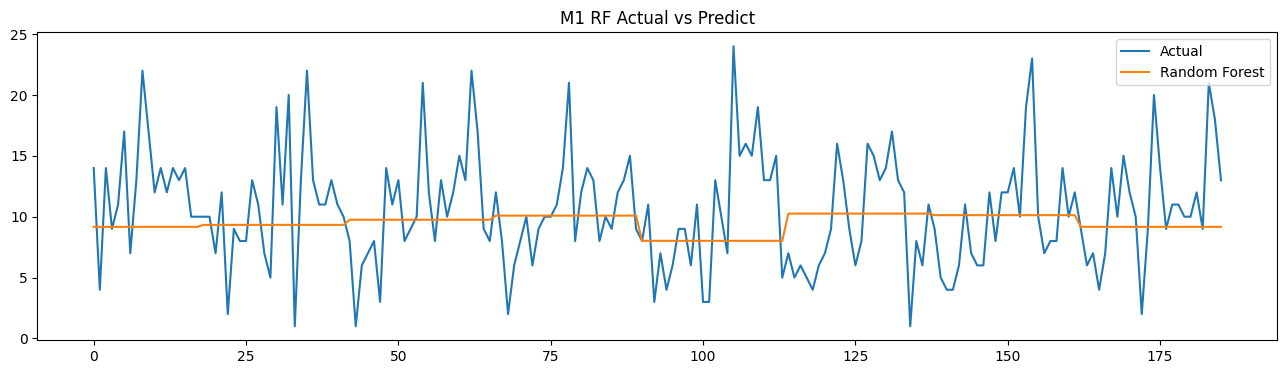

In [19]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(m1_train.drop(columns=['amount']), m1_train['amount'])
rf_pred = rf.predict(m1_test.drop(columns=['amount']))
rf_mse = mean_squared_error(m1_test['amount'], rf_pred)
print('Random Forest MSE:', rf_mse)

plt.figure(figsize=(16, 4))
plt.plot(m1_test['amount'].values, label='Actual')
plt.plot(rf_pred, label='Random Forest')
plt.legend()
plt.title('M1 RF Actual vs Predict');

## Evaluate

from graph seemlike both linear regression can't predict that accurate